In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('TestDrugs.csv')

dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
# Encode data from strings to numbers
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

def label_encoder(y):
    le = LabelEncoder()
    dataset[y] = label.fit_transform(dataset[y])
    
label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [3]:
# Split into training and testing data
from sklearn.model_selection import train_test_split
X = dataset.iloc[0:200, 1:5].values
y = dataset.iloc[0:200, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
class KNN():
    """
    Define the KNN class
    """
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """
        Fit the model using X as array of features and y as array of labels.
        """
        n_samples = X.shape[0]
        # number of neighbors can't be larger then number of samples
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors can't be larger then number of samples in training set.")

        # X and y need to have the same number of samples
        if X.shape[0] != y.shape[0]:
            raise ValueError("Number of samples in X and y need to be equal.")

        self.X = X
        self.y = y

    def predict(self, X_test):

        # number of predictions to make and number of features inside single sample
        n_samples, n_features = X_test.shape

        # allocationg space for array of predictions
        predictions = np.empty(n_samples, dtype=int)

        # loop over all observations
        for i in range(n_samples):
            # calculation of single prediction
            predictions[i] = single_prediction(self.X, self.y, X_test[i, :], self.n_neighbors)

        return (predictions)

# runs a single KNN prediction
def single_prediction(X, y, x_test, k):
    # number of samples inside testing set
    n_samples = X.shape[0]

    # create array for distances and targets
    distances = np.zeros(n_samples)

    # distance calculation
    for i in range(n_samples):
        distances[i] = (x_test - X[i]).dot(x_test - X[i])

    # combining arrays as columns, concatenates arrays along second axis
    distances = sp.c_[distances, y]
    # sorting array by value of first column (distance)
    sorted_distances = distances[distances[:, 0].argsort()]

    # selecting labels associeted with k smallest distances (k Nearest Neighbors)
    targets = sorted_distances[0:k, 1]

    unique, counts = np.unique(targets, return_counts=True)

    return (unique[np.argmax(counts)])

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

my_testing_accuracy = np.zeros(40)
for i in range(1,41):
    # Instantiate learning model using k
    my_classifier = KNN(n_neighbors=i)
    my_classifier.fit(X_train, y_train)
    my_y_pred = my_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, my_y_pred)*100
    my_testing_accuracy[i-1] = accuracy
    #print('Accuracy of my model is equal ' + str(round(accuracy, 2)) + ' %.')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


testing_accuracy = np.zeros(40)
for i in range(1,41):
    # Instantiate learning model (k = 3)
    classifier = KNeighborsClassifier(n_neighbors=i)
    # Fitting the model
    classifier.fit(X_train, y_train)
    # Predicting the test set results
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)*100
    testing_accuracy[i-1] = accuracy
    # print('Accuracy of library model is equal ' + str(round(accuracy, 2)) + ' %.')

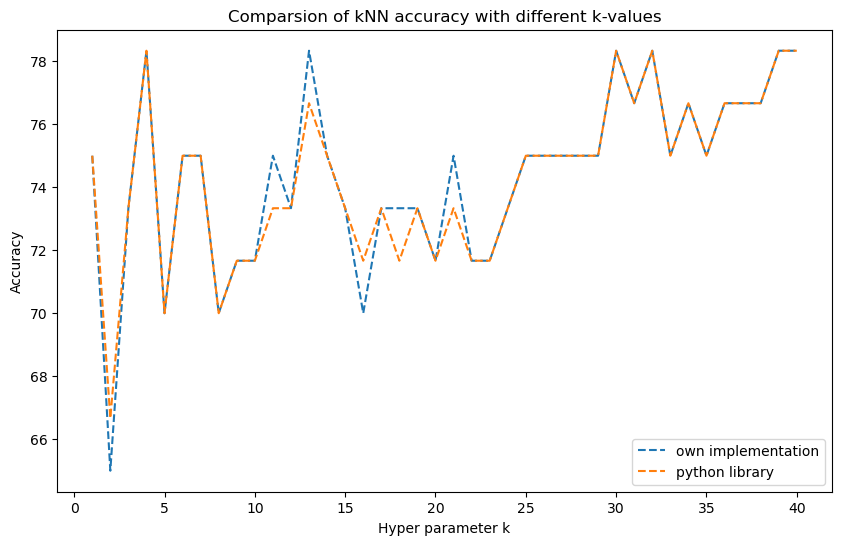

In [12]:
hyper_parameter = np.arange(1, 41, dtype=int)
plt.figure(figsize=(10,6))
plt.plot(hyper_parameter, my_testing_accuracy, linestyle='--')
plt.plot(hyper_parameter, testing_accuracy, linestyle='dashed')
plt.xlabel("Hyper parameter k")
plt.ylabel("Accuracy")
plt.title('Comparsion of kNN accuracy with different k-values')
plt.legend(['own implementation', 'python library'])

plt.show()